### **Import the Livrary**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### **Add the data and check it**

In [2]:
bank_df = pd.read_csv('bank.csv')

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Data Description**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

**Feature**

1. age | int64 | age in years
2. job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])
3. marital | object | marital status (categorical: ['married' 'single' 'divorced'])
4. education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])
5. default | Object | has credit in default? (categorical: ['no' 'yes'])
6. balance | int64 | Balance of the individual
7. housing | object | has housing loan? (categorical: ['yes' 'no'])
8. loan | object | has personal loan? (categorical: ['no' 'yes'])
9. contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])
10. day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])
12. duration | int64 | last contact duration, in seconds (numeric)
13. campaign | int64 | number of contacts performed during this campaign and for this client
14. pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous | int64 | number of contacts performed before this campaign and for this client
16. poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

**Label**

deposit | object | has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
#info

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
#check the shape of the dataset

bank_df.shape

(11162, 17)

In [7]:
#check the colum for each object feature

print("unique value for each column with type 'object' \n")

for col in bank_df.select_dtypes(include=['object']).columns:
    print(f"🔹 Kolom: {col}")
    print(f"   Nilai unik: {bank_df[col].unique()}\n")

unique value for each column with type 'object' 

🔹 Kolom: job
   Nilai unik: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

🔹 Kolom: marital
   Nilai unik: ['married' 'single' 'divorced']

🔹 Kolom: education
   Nilai unik: ['secondary' 'tertiary' 'primary' 'unknown']

🔹 Kolom: default
   Nilai unik: ['no' 'yes']

🔹 Kolom: housing
   Nilai unik: ['yes' 'no']

🔹 Kolom: loan
   Nilai unik: ['no' 'yes']

🔹 Kolom: contact
   Nilai unik: ['unknown' 'cellular' 'telephone']

🔹 Kolom: month
   Nilai unik: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

🔹 Kolom: poutcome
   Nilai unik: ['unknown' 'other' 'failure' 'success']

🔹 Kolom: deposit
   Nilai unik: ['yes' 'no']



### **Exploratory Data Analysis**

**Exploratory Data Analysis (EDA)** adalah proses eksplorasi data secara mendalam sebelum membangun model Machine Learning. Tujuannya adalah memahami karakteristik dataset, menemukan pola, hubungan antar variabel, serta mendeteksi anomali atau masalah dalam data.


**✨ Kenapa EDA Itu Penting?**

EDA penting karena:

>1. Mendeteksi Kesalahan Data → Misalnya nilai kosong (missing values) atau outlier.
>2.  Memahami Distribusi Data → Untuk memilih metode preprocessing yang tepat.
>3. Melihat Korelasi Antar Variabel → Misalnya mencari hubungan antara fitur dan target.
>4. Memilih Fitur yang Relevan → Menghindari fitur yang tidak berguna bagi model.






**In this project, we will do:**



*   Find Missing Values

*   Find Features with one value

* Explore the Categorical Features
* Find Categorical Feature Distribution
* Relationship between Categorical Features and Label
* Explore the Numerical Features
* Find Discrete Numerical Features
* Relation between Discrete numerical Features and Labels
* Find Continous Numerical Features
* Distribution of Continous Numerical Features
* Relation between Continous numerical Features and Labels
* Find Outliers in numerical features
* Explore the Correlation between numerical features
* Find Pair Plot
* Check the Data set is balanced or not based on target values in classification

In [8]:
#find missing column

bank_df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:

if bank_df.isnull().sum().sum() == 0:
    print('There is no missing value in this dataset')
else:
    print('There is missing value in this dataset')

There is no missing value in this dataset


In [10]:
#Explore categorical column

categorical_features = [col for col in bank_df.select_dtypes(include=['object']) if col != ['deposit']]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [11]:
for feature in categorical_features:
  print(f"The feature '{feature}' has {bank_df[feature].nunique()} unique categories ")

The feature 'job' has 12 unique categories 
The feature 'marital' has 3 unique categories 
The feature 'education' has 4 unique categories 
The feature 'default' has 2 unique categories 
The feature 'housing' has 2 unique categories 
The feature 'loan' has 2 unique categories 
The feature 'contact' has 3 unique categories 
The feature 'month' has 12 unique categories 
The feature 'poutcome' has 4 unique categories 
The feature 'deposit' has 2 unique categories 


* There are 9 categorical column
* featrue jobs and month has the highest unique category for categorical column

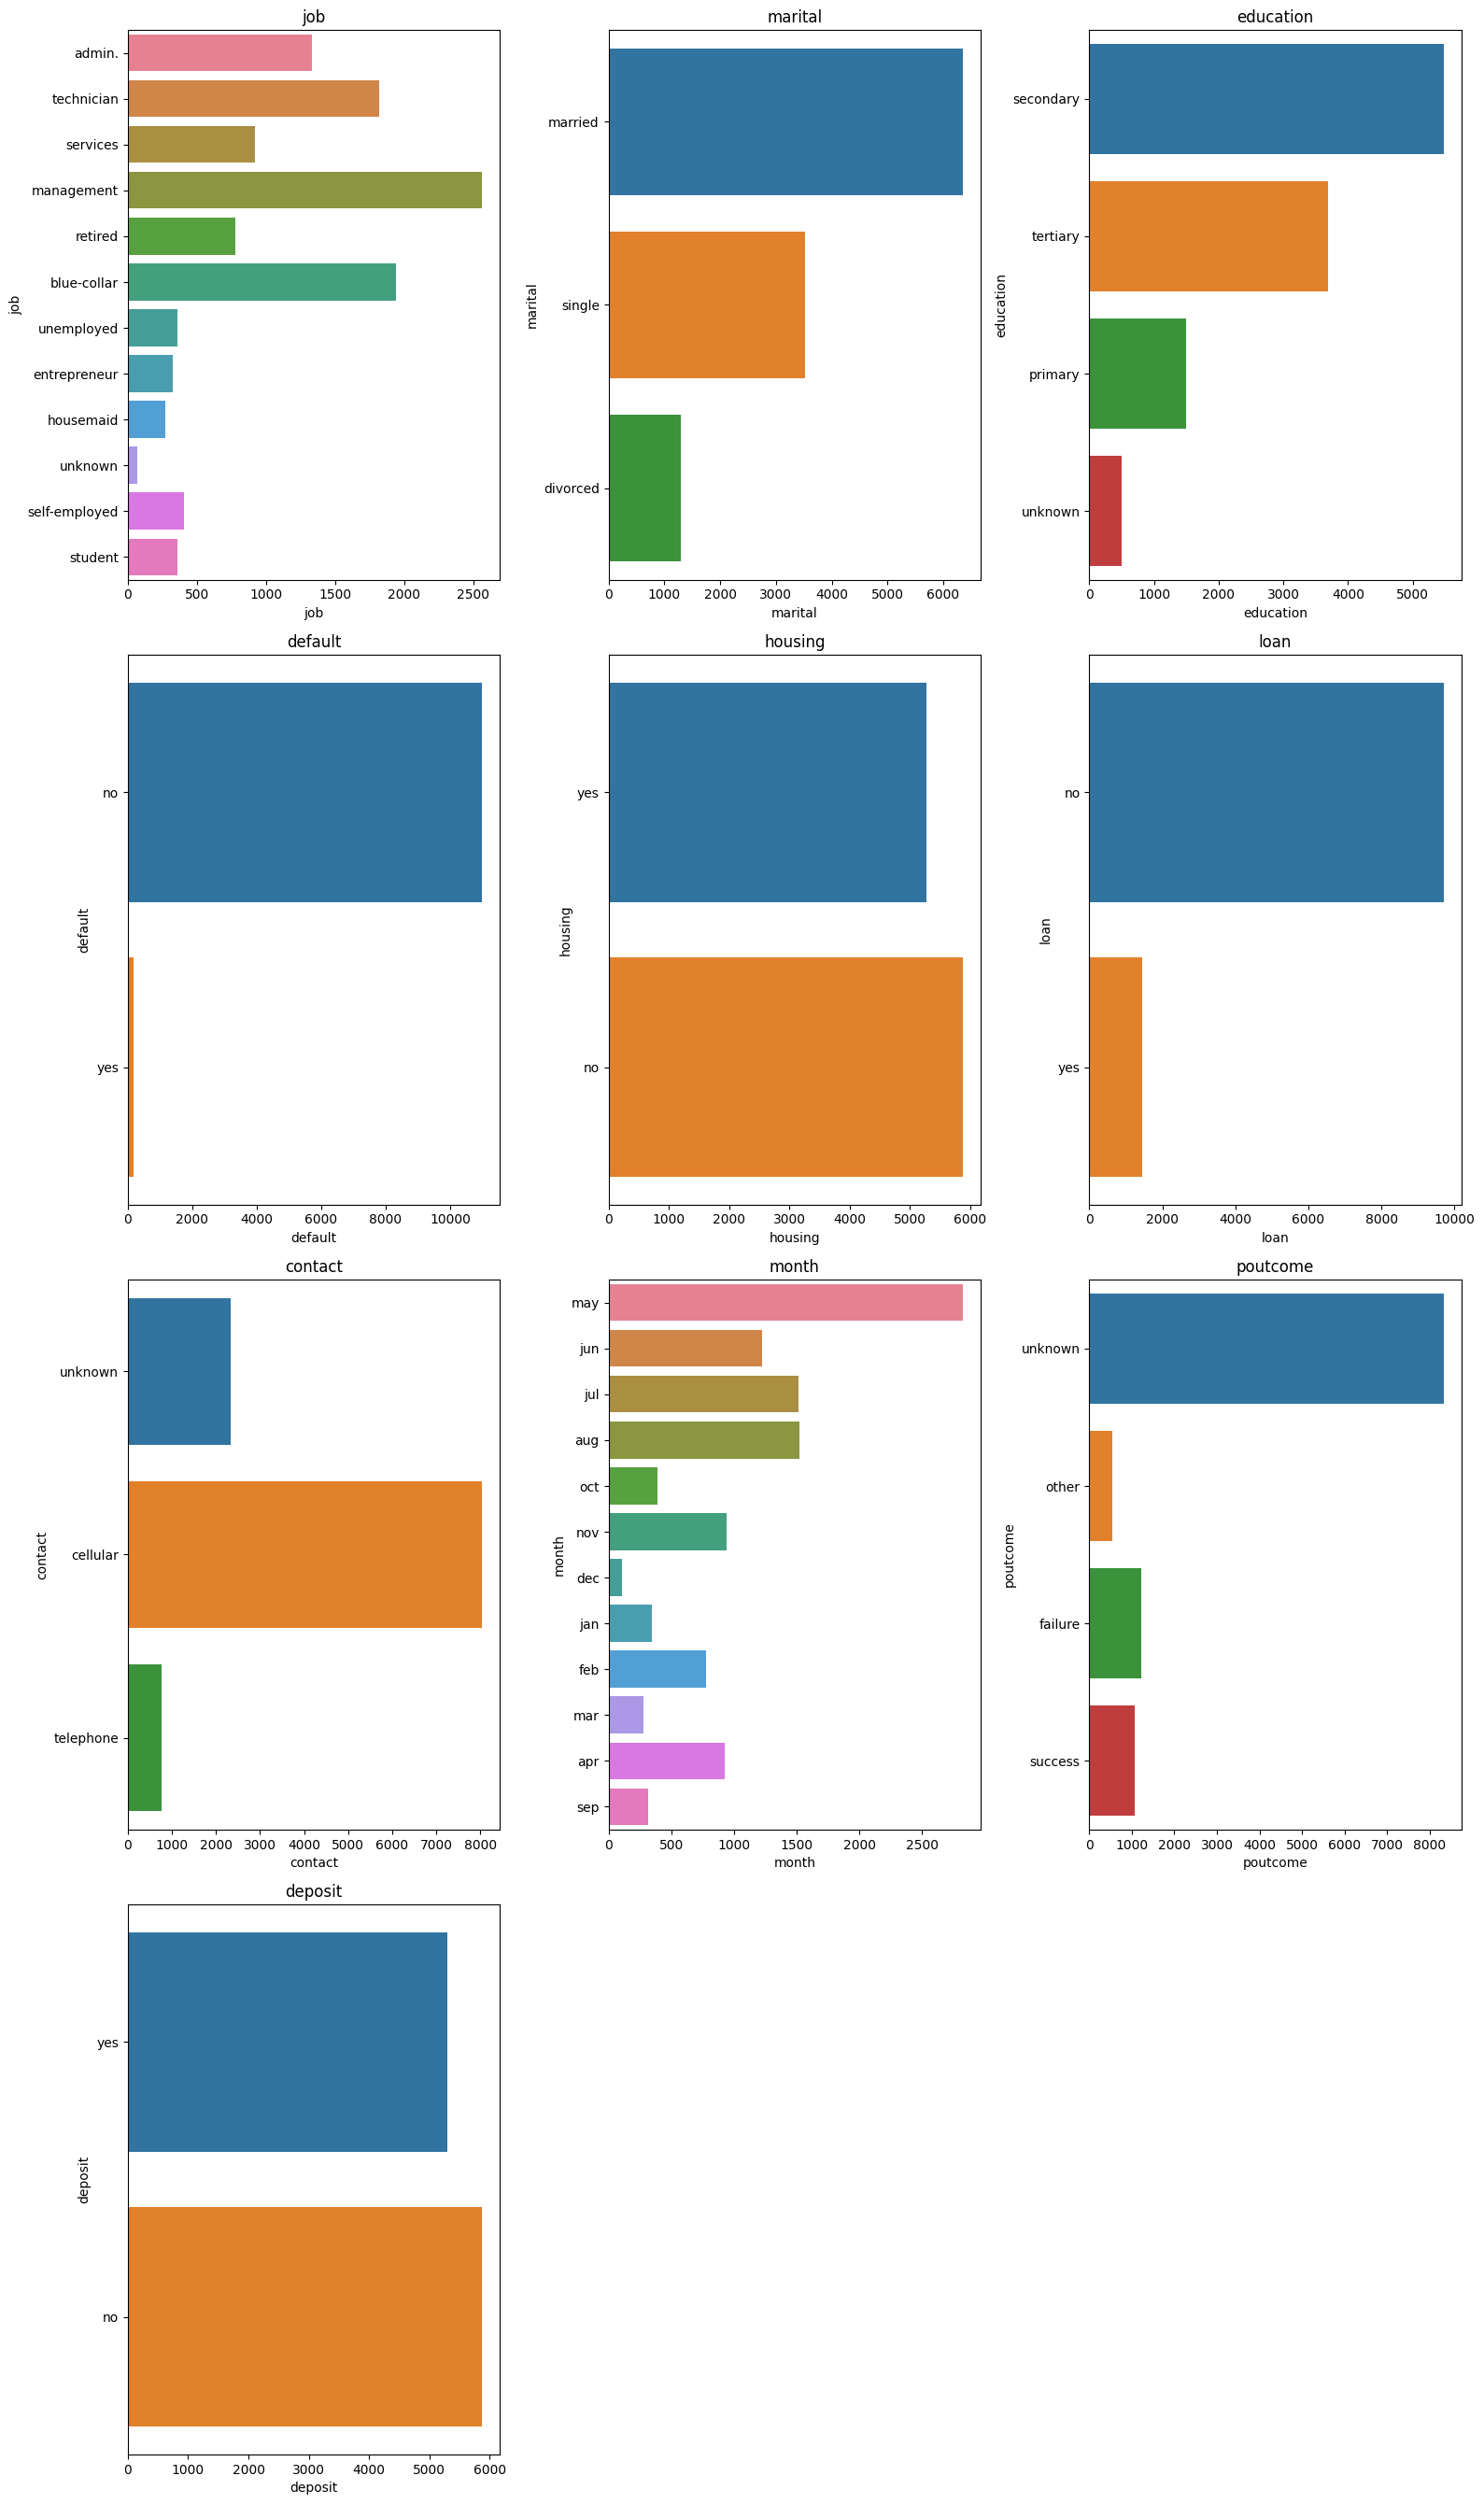

In [12]:
#find categorical features distribution

plt.figure(figsize=(16,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature, hue=categorical_feature, data=bank_df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+=1

plt.tight_layout()
plt.show()

* client with job type as management records are high in given dataset and housemaid are very less
* client who married are high in records in given dataset and divorced are less
* client whoes education background is secondary are in high numbers in given dataset
* defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
* data in month of may is high and less in dec

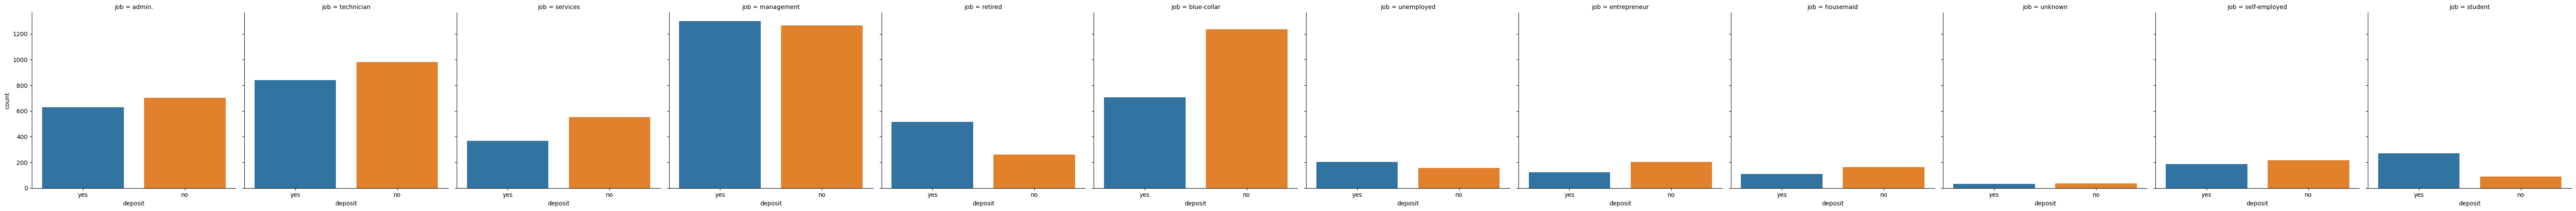

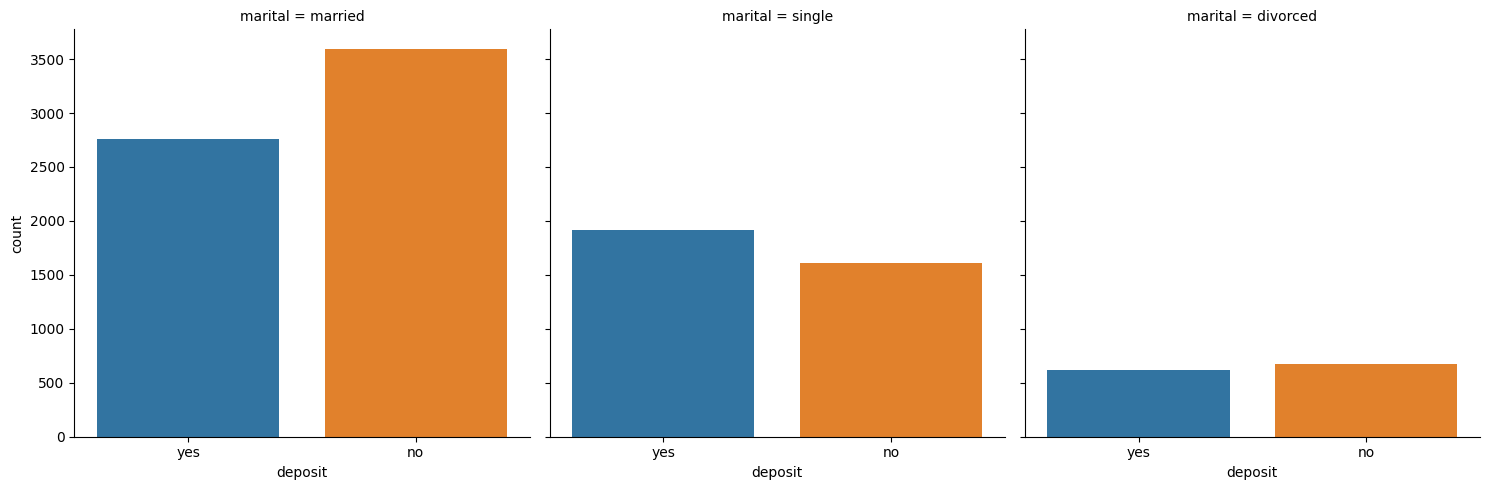

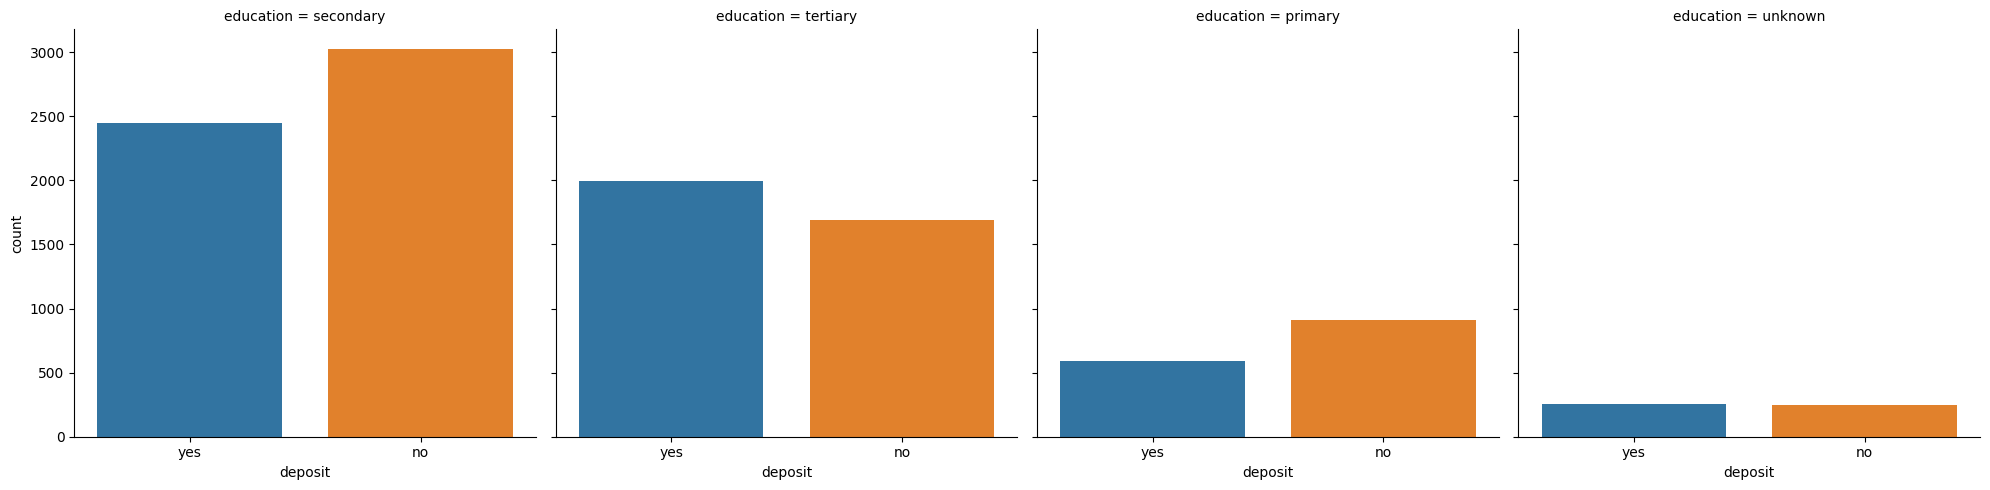

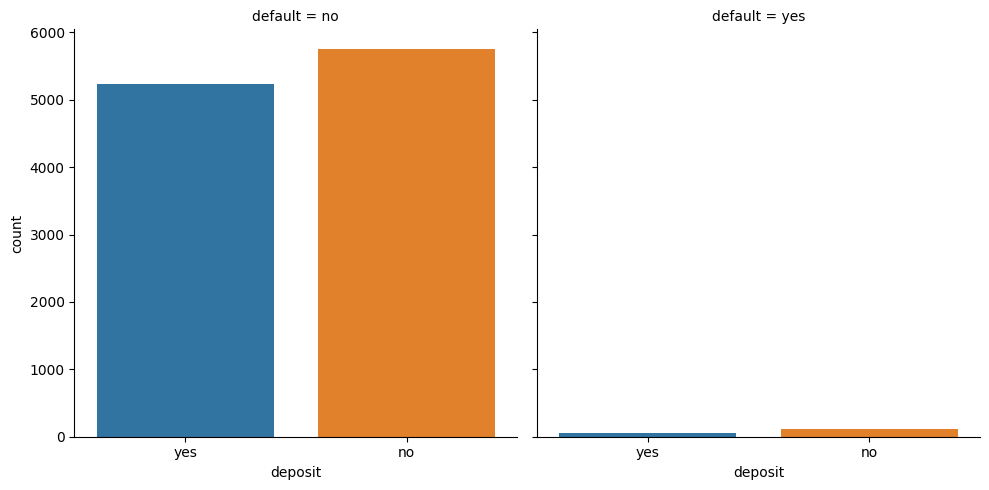

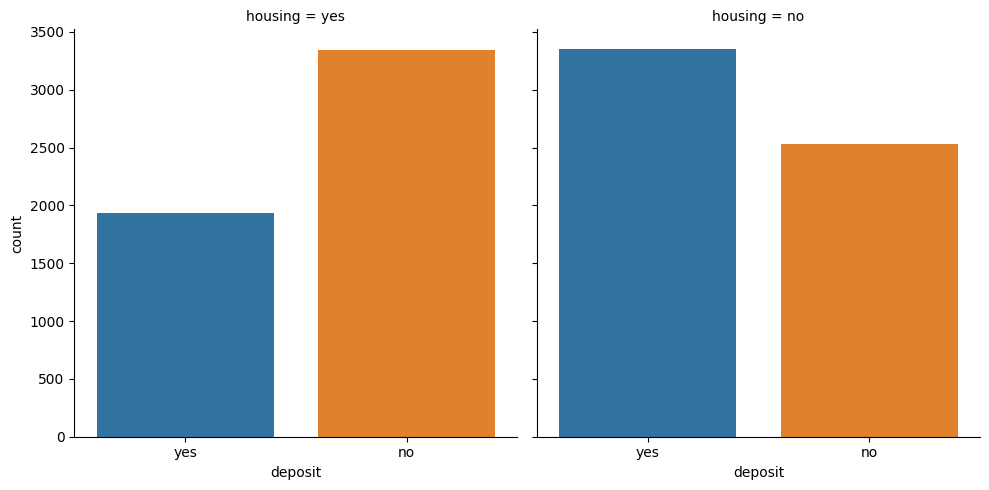

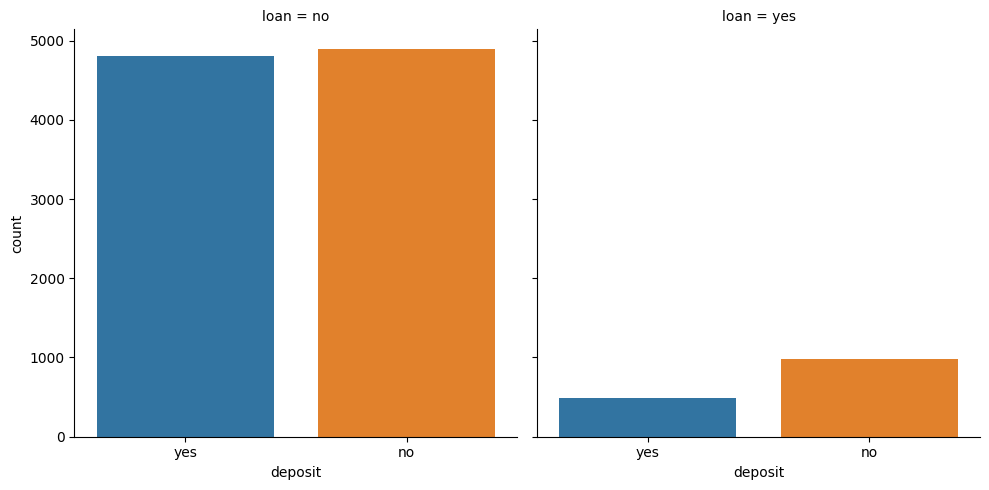

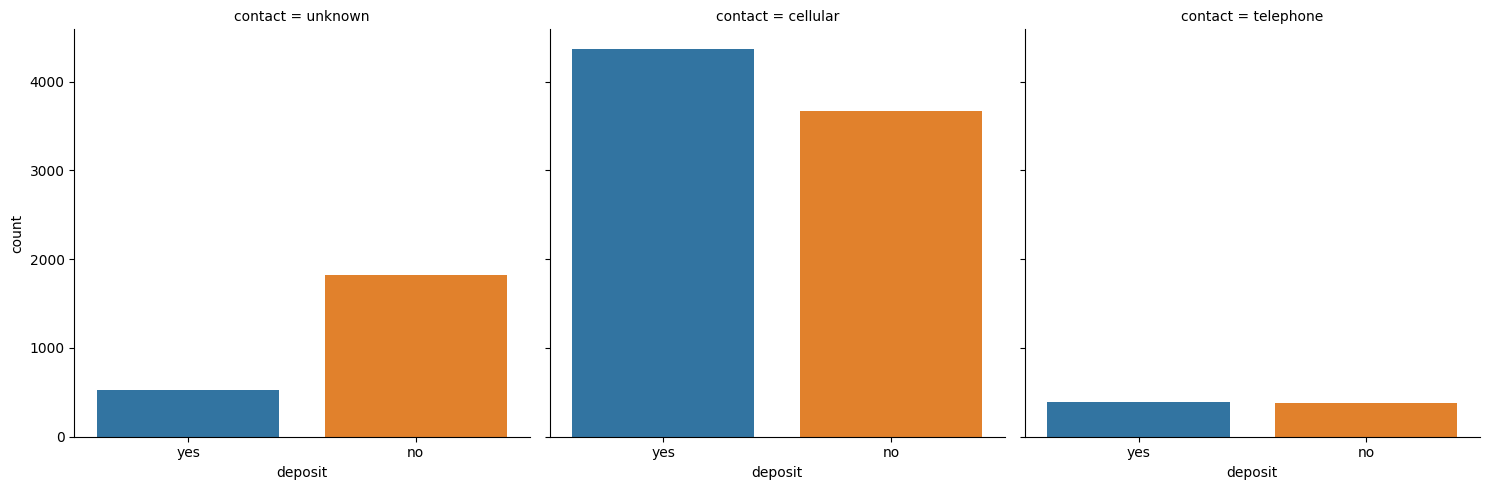

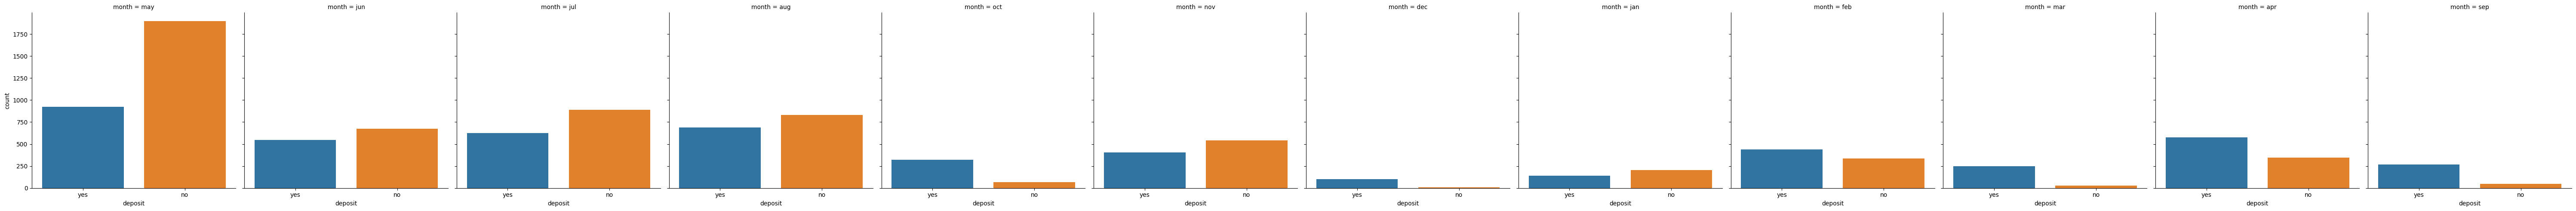

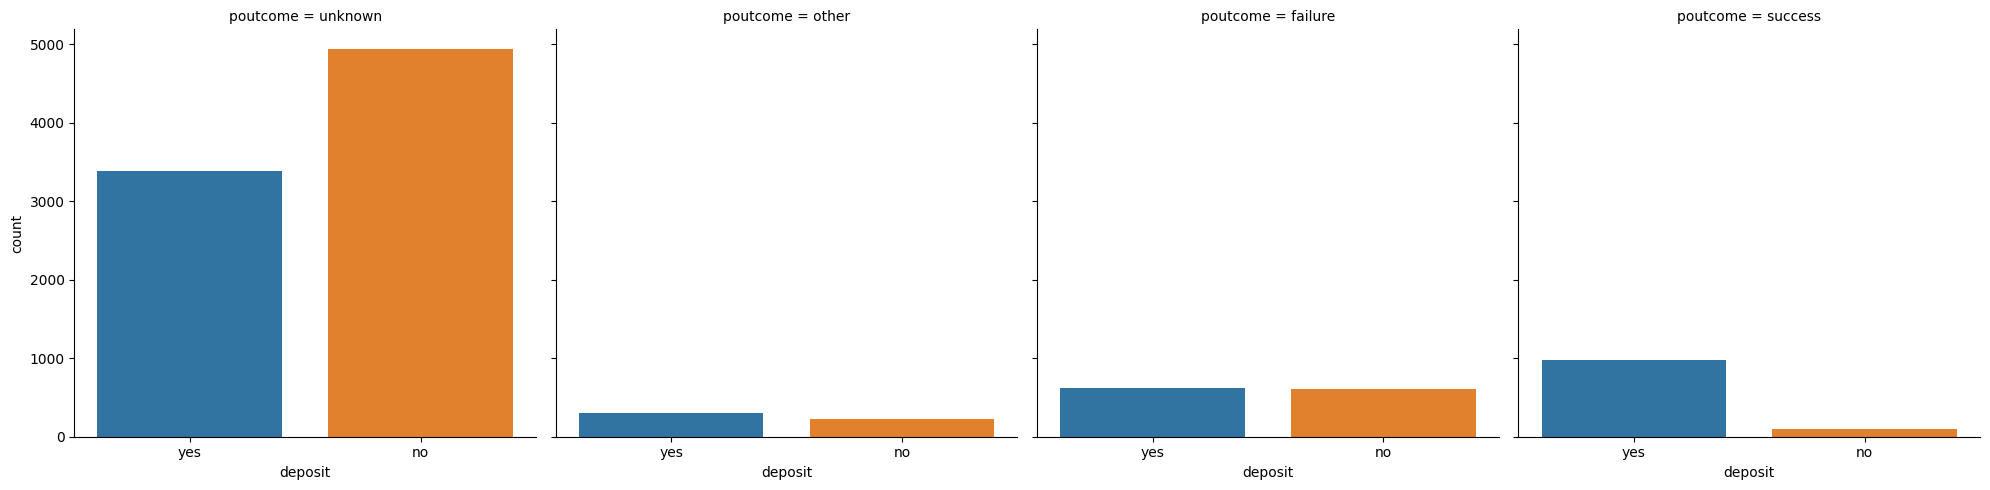

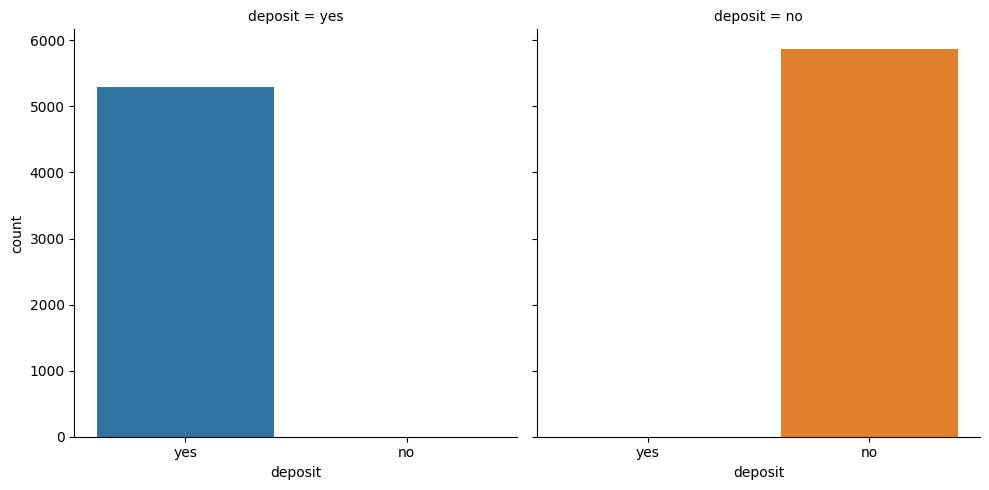

In [13]:
#relationship between categorical features and the label (deposit)

for categorical_feature in categorical_features:
  sns.catplot(x='deposit', kind= 'count', col=categorical_feature, hue='deposit', data=bank_df)
  plt.show()

In [14]:
#check target label split over categorical features and find the count

for categorical_feature in categorical_features:
  print(bank_df.groupby(['deposit', categorical_feature]).size())
  print('\n')

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64


deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64


deposit  education
no       p

* retired client has high interest on deposit
* client who has housing loan seems to be not interested much on deposit
* if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
* in month of March, September, October and December, client show high interest to deposit
* in month of may, records are high but client interst ratio is very less

In [15]:
#explore numerical values

numerical_features = [col for col in bank_df.columns if bank_df[col].dtype != 'object']
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
print("Number of numerical values : ", len(numerical_features))

Number of numerical values :  7


In [17]:
#check the unique categories in numerical

for feature in numerical_features:
  print(f"The feature '{feature}' has {bank_df[feature].nunique()} unique categories ")

The feature 'age' has 76 unique categories 
The feature 'balance' has 3805 unique categories 
The feature 'day' has 31 unique categories 
The feature 'duration' has 1428 unique categories 
The feature 'campaign' has 36 unique categories 
The feature 'pdays' has 472 unique categories 
The feature 'previous' has 34 unique categories 


In [18]:
#visualize the numerical variables
bank_df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [19]:
# Looking for numeric features with a small number of unique values (e.g., less than 20)
discrete_features = [feature for feature in bank_df.columns if bank_df[feature].dtype != 'O' and bank_df[feature].nunique() < 20]

if (len(discrete_features) == 0):
  print("Fitur dengan nilai diskrit: 0 ")
else:
  print("Fitur dengan nilai diskrit: ", len(discrete_features))
  print(discrete_features)

Fitur dengan nilai diskrit: 0 


There is no discrete value

In [20]:
#find continuous features

continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['deposit']]
print(f"Continous feature count : {len(continuous_features)} ")
print(continuous_features)

Continous feature count : 7 
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


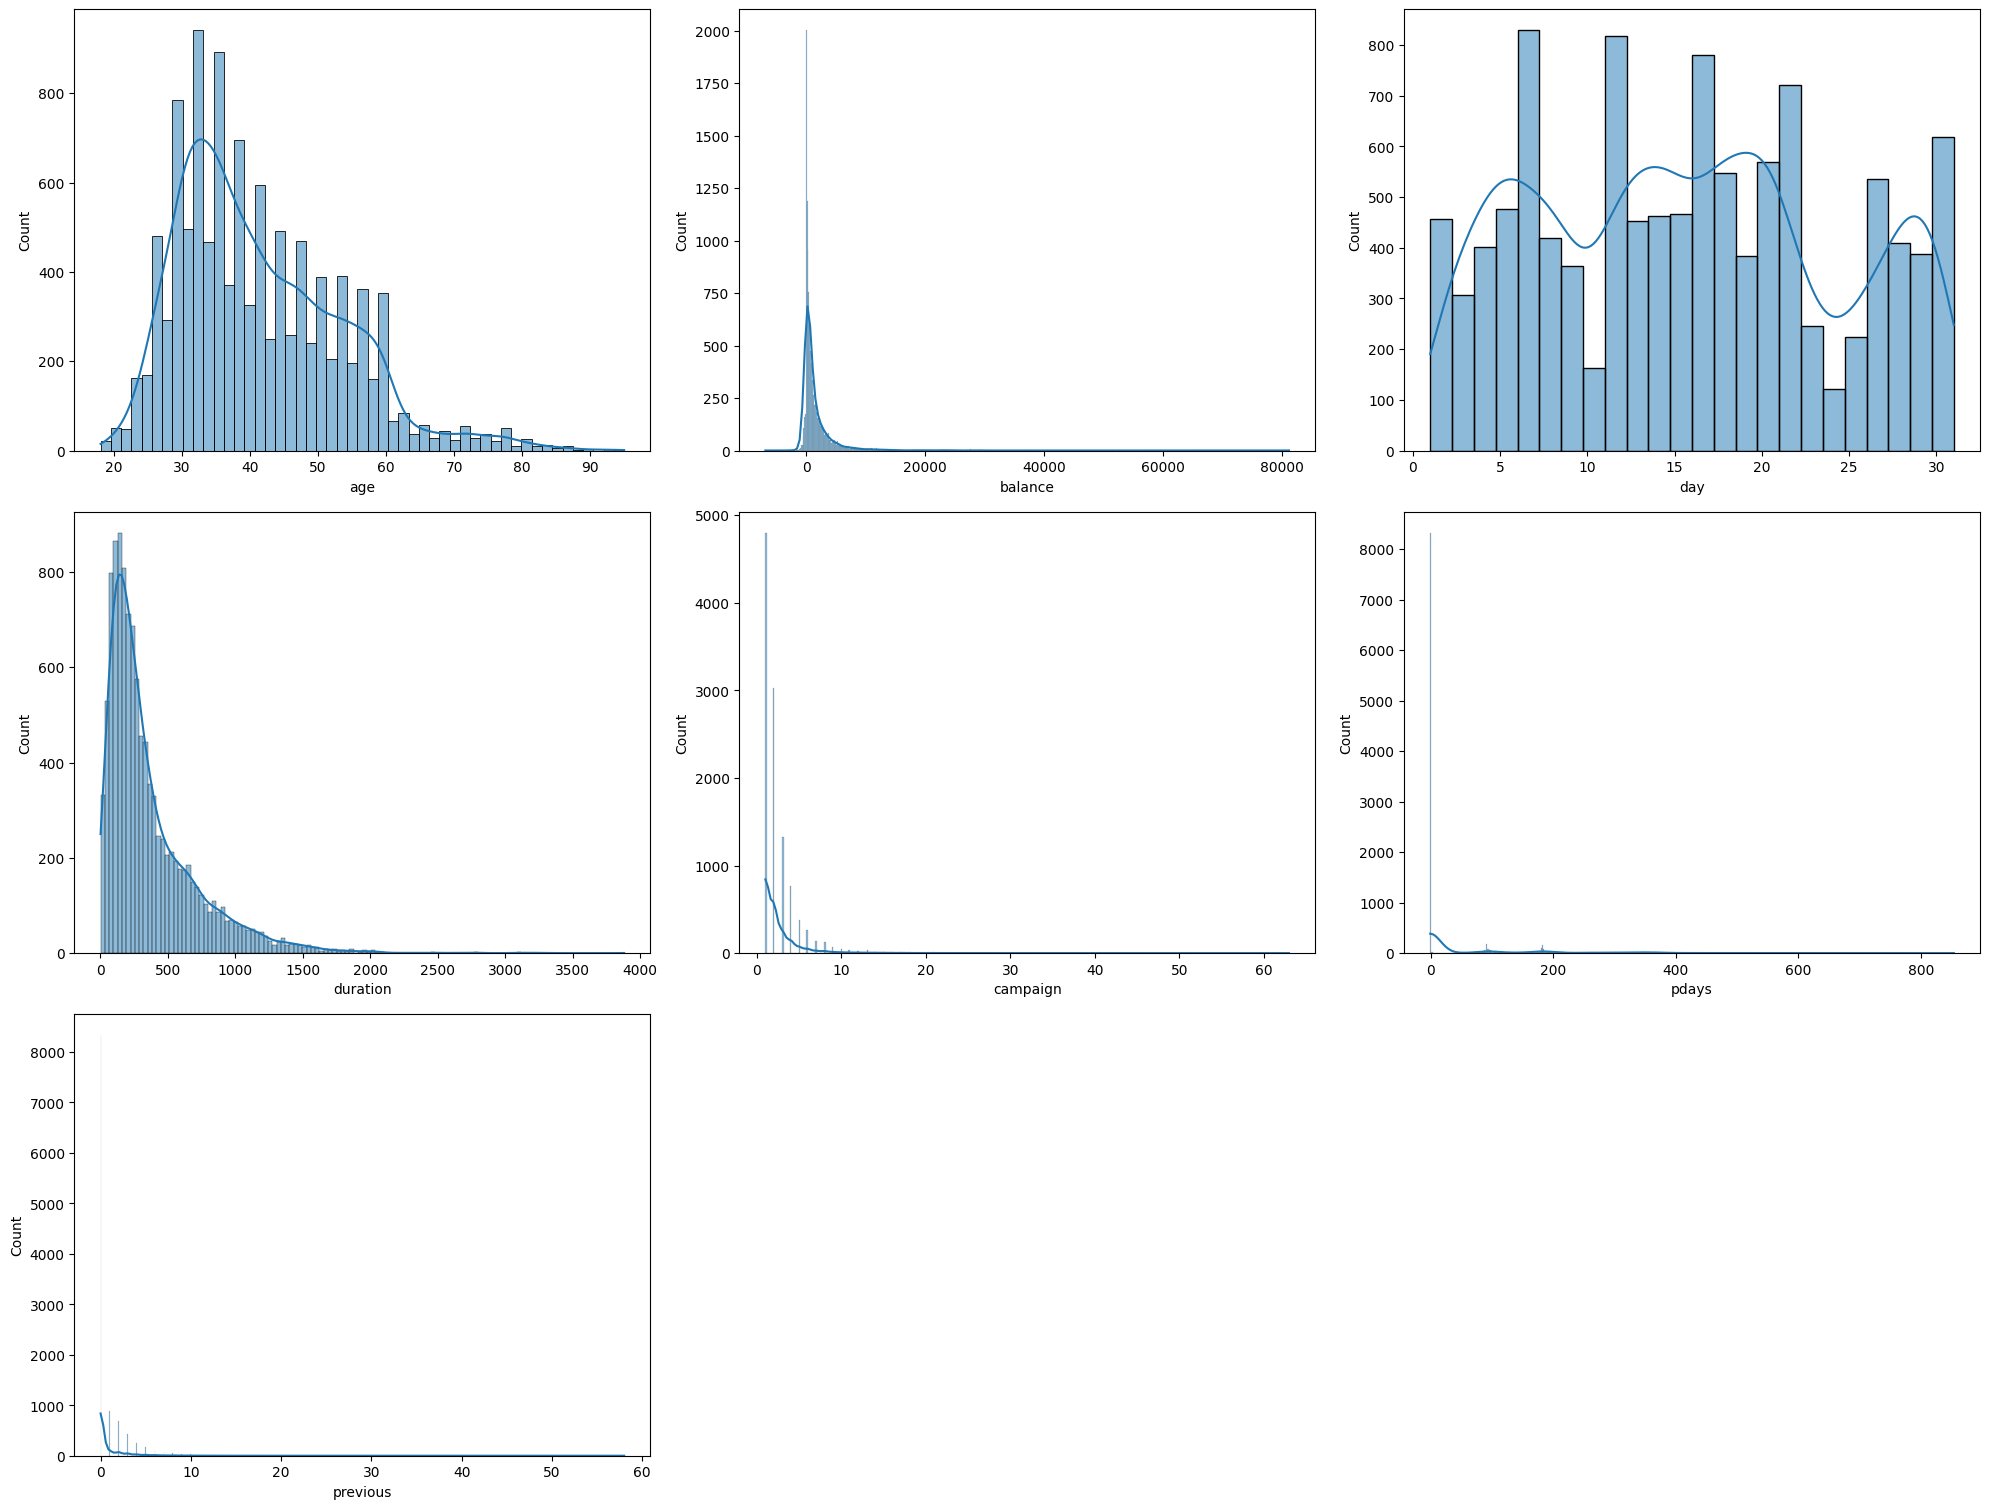

In [21]:
#Distribution of continous feature

plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.histplot(bank_df[continuous_feature], kde=True)
  plt.xlabel(continuous_feature)
  plotnumber += 1

plt.tight_layout()
plt.show()

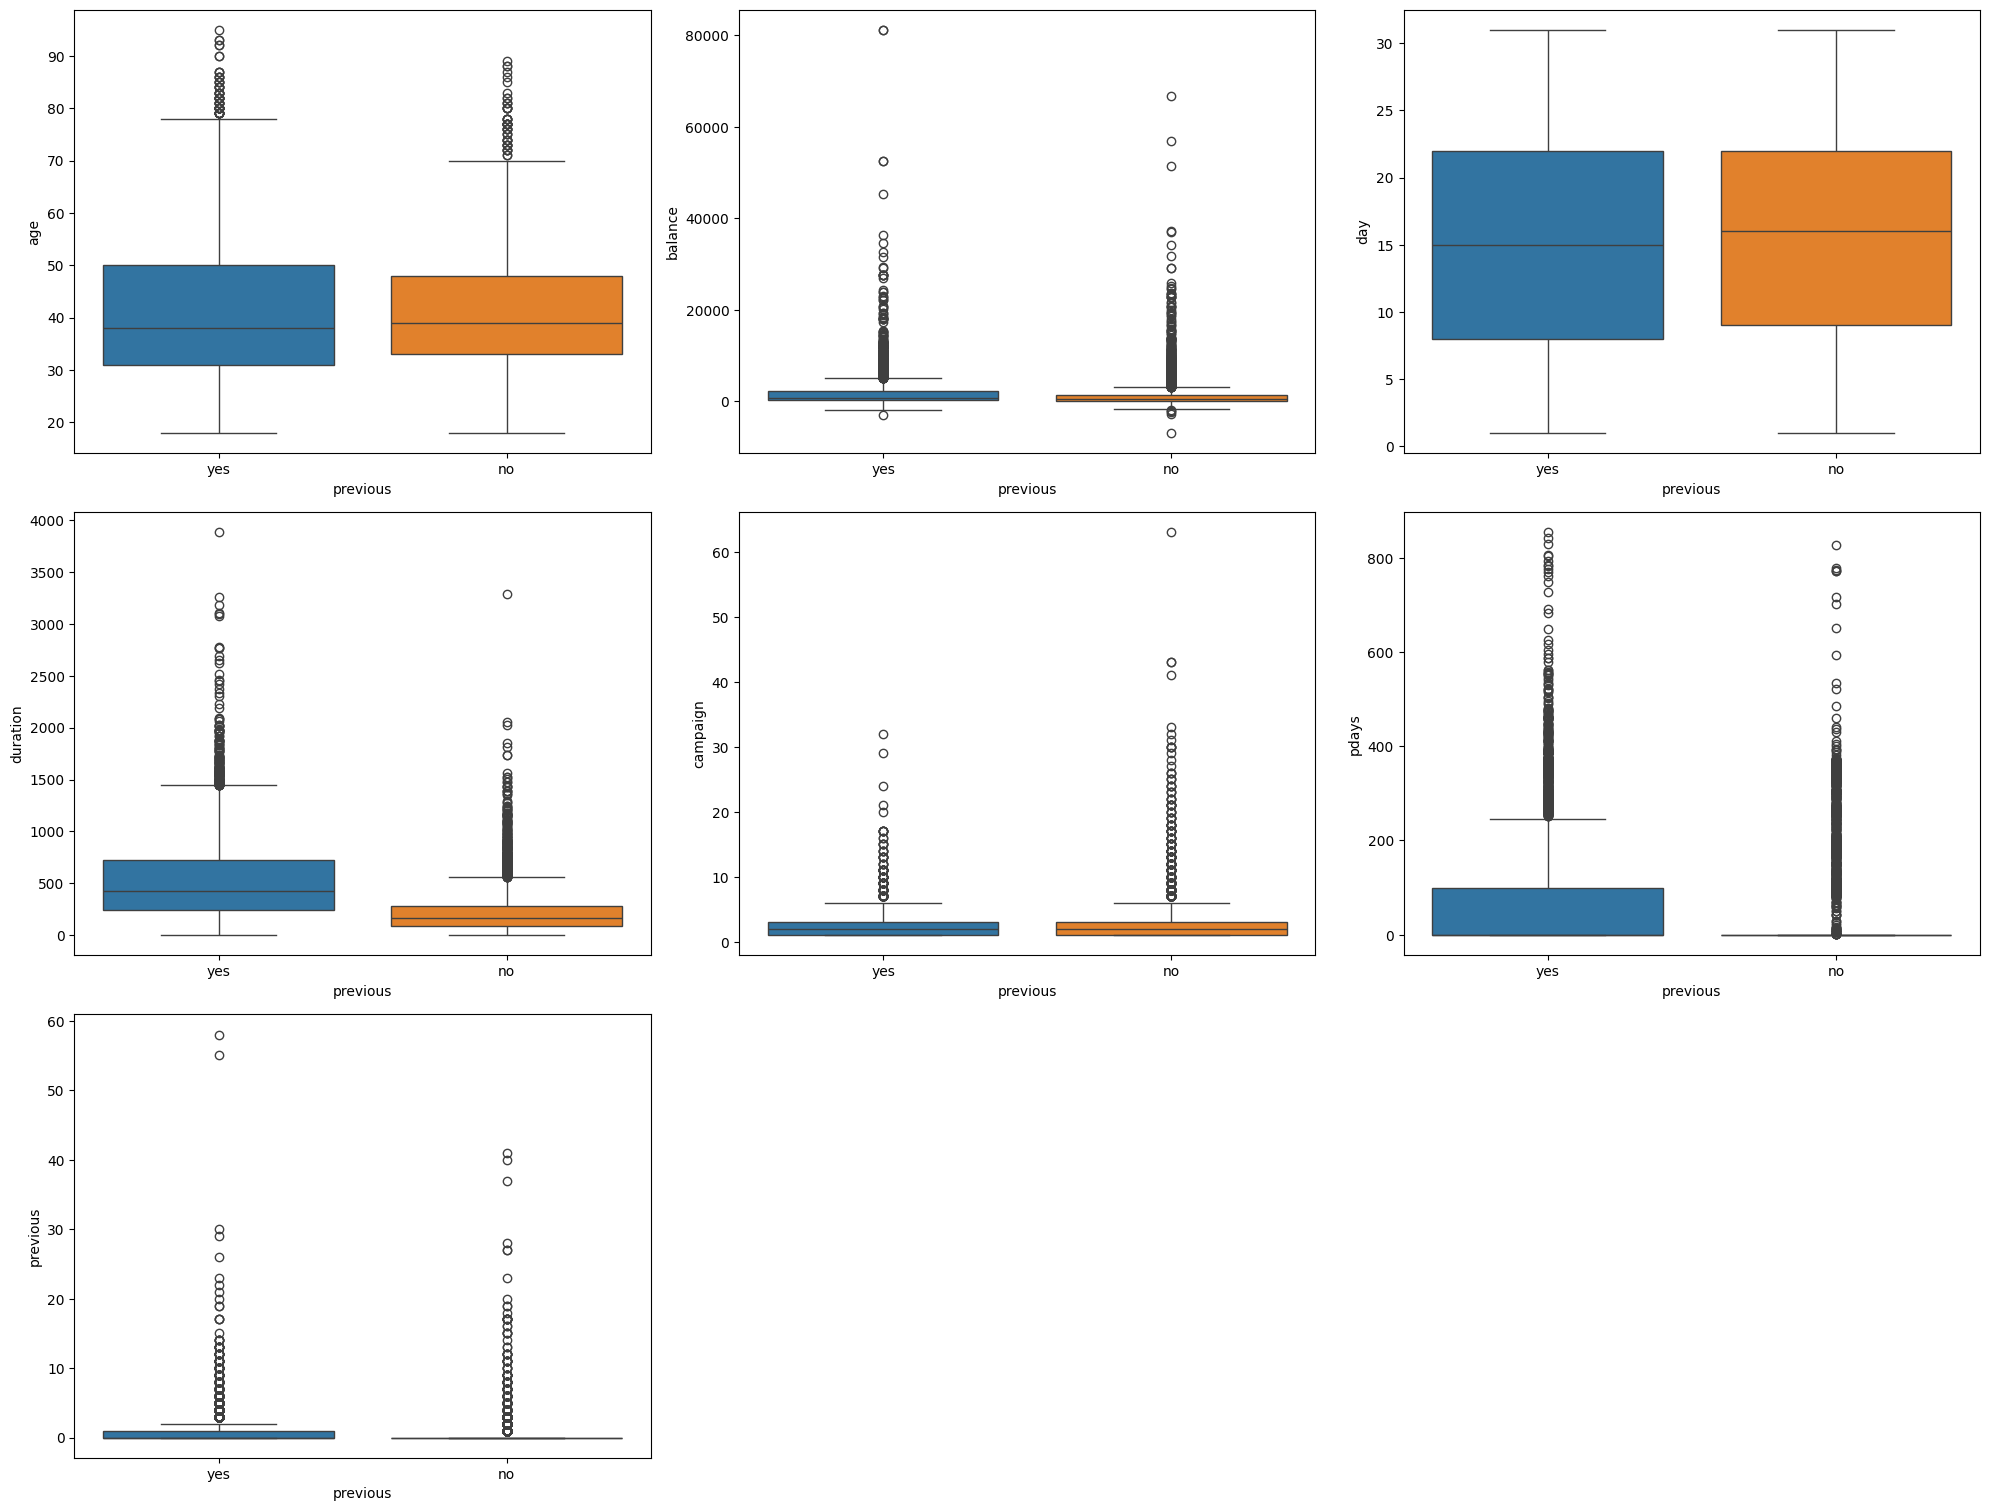

In [22]:
#Relation between numerical features and  the label (deposit)

plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
for feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(x="deposit", y=bank_df[feature], data=bank_df, hue="deposit")
  plt.xlabel(continuous_feature)
  plotnumber += 1

plt.tight_layout()
plt.show()

**client shows interest on deposit who had discussion for longer duration**

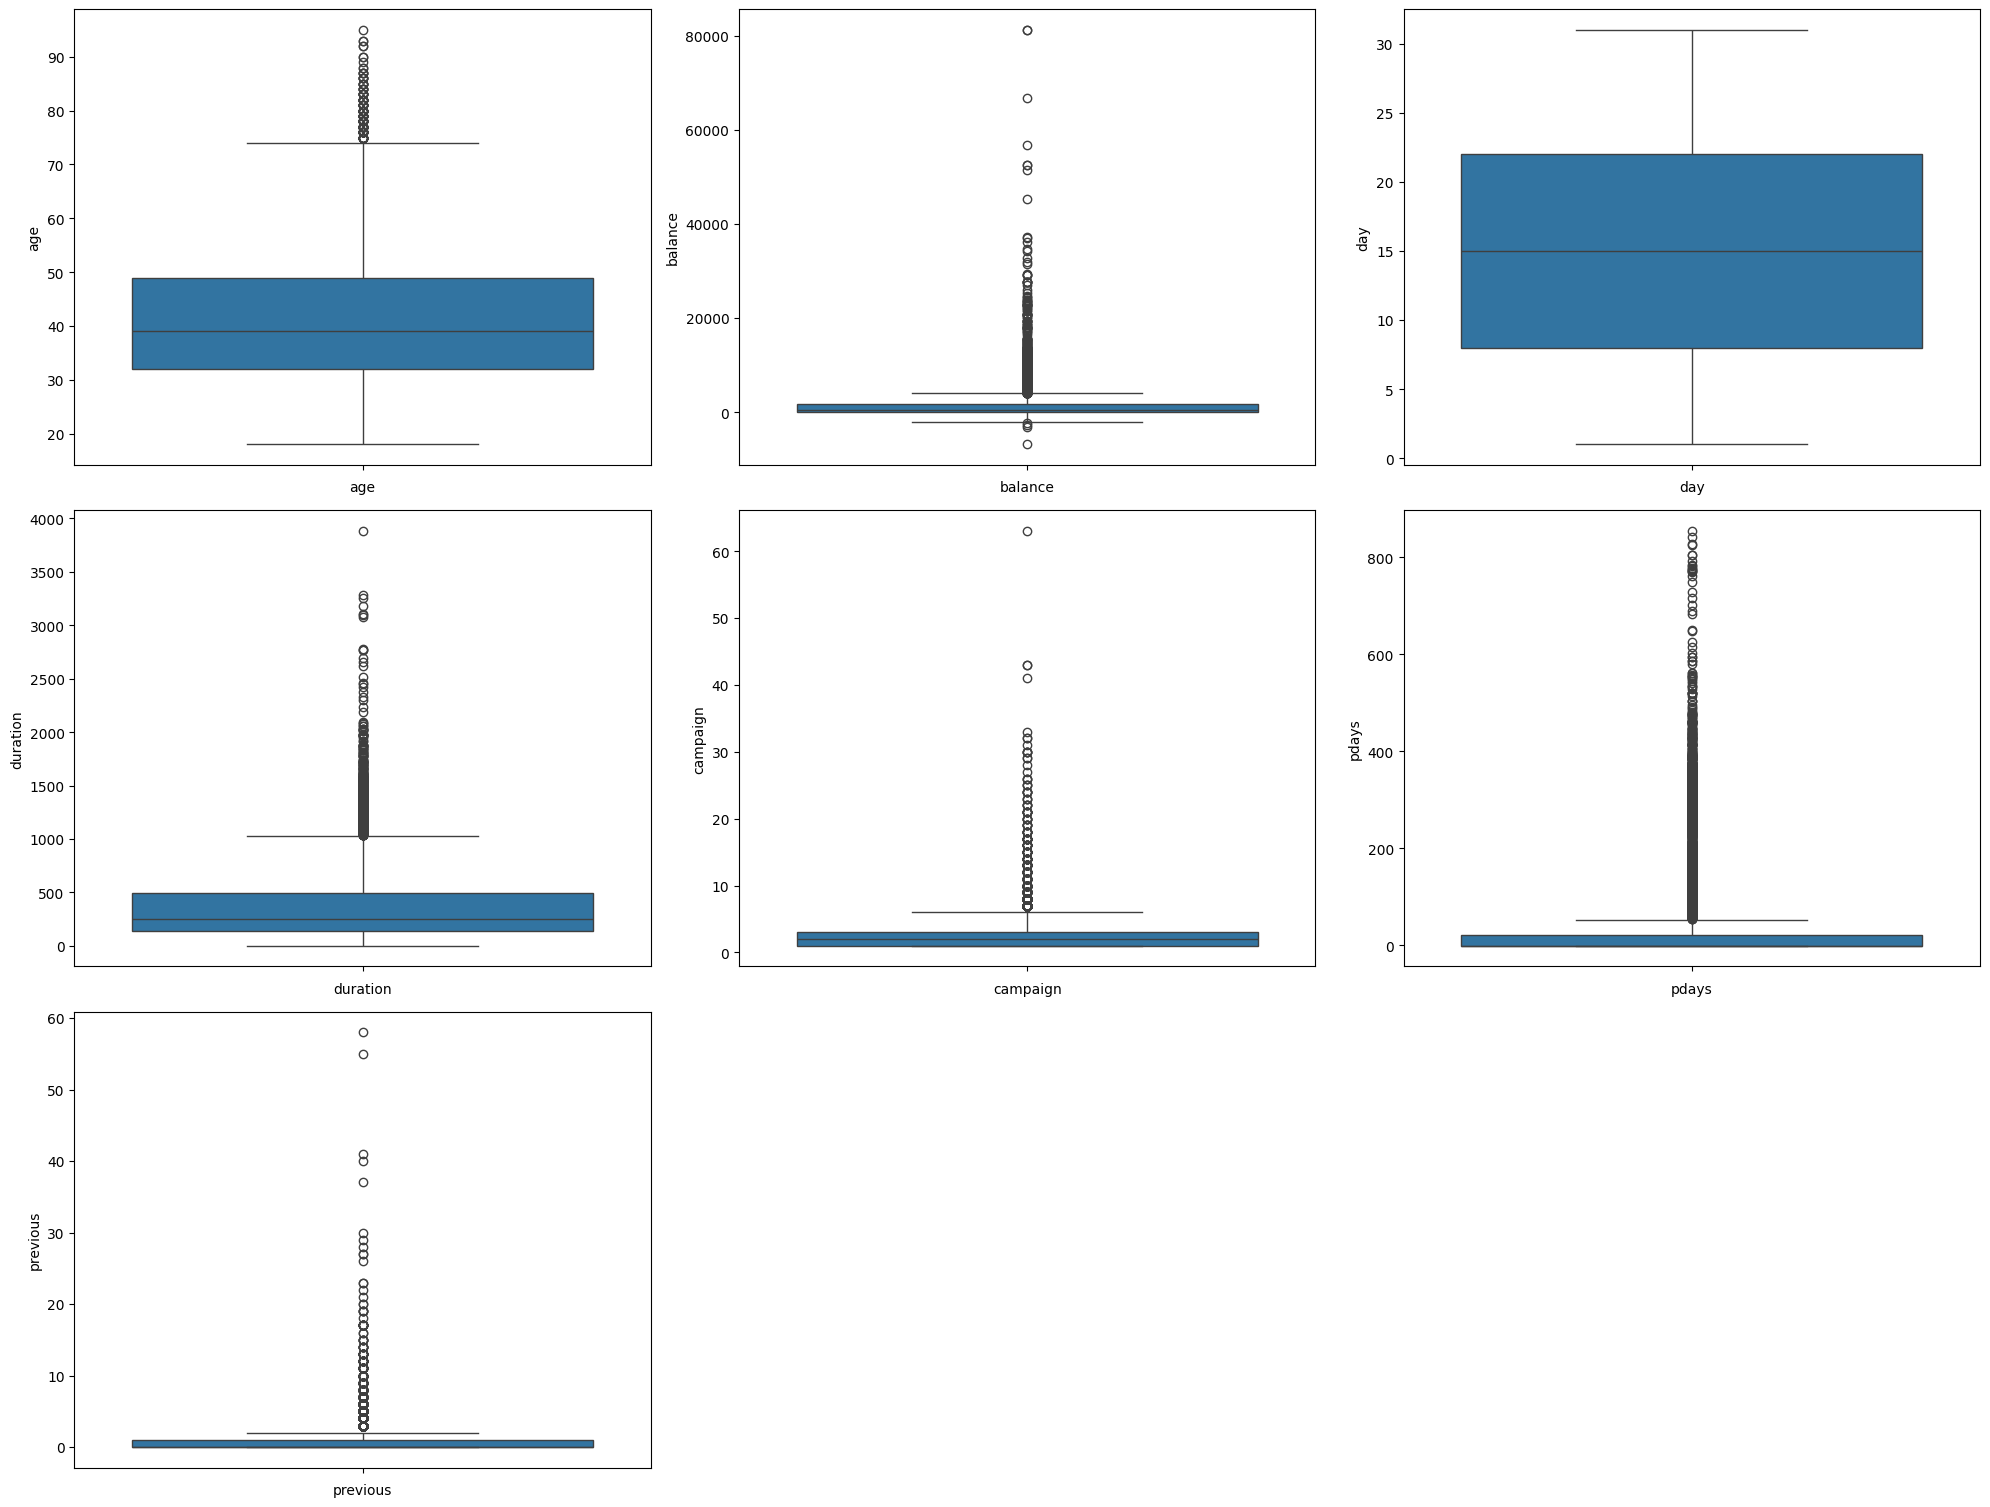

In [23]:
#create boxplot for numerical features to find outliers

plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
for feature in numerical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(bank_df[feature])
  plt.xlabel(feature)
  plotnumber += 1

plt.tight_layout()
plt.show()

**age, balance, duration, compaign, pdays and previous has some outliers**

<Axes: >

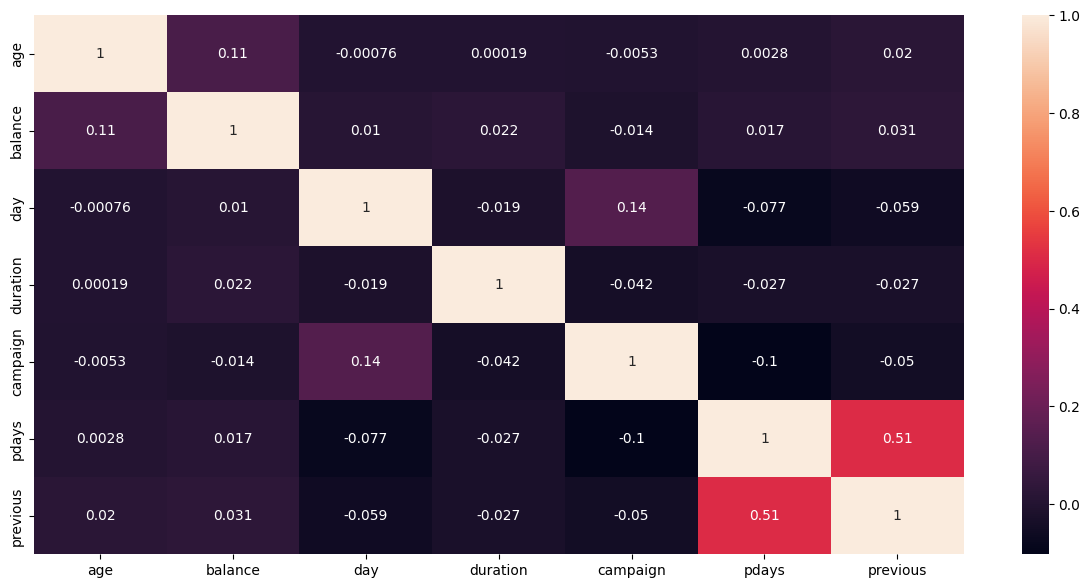

In [24]:
#explore the correlation between numerical values

bank_cor = bank_df[numerical_features].corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(bank_cor,annot=True)

**Check the label is balanced or not**

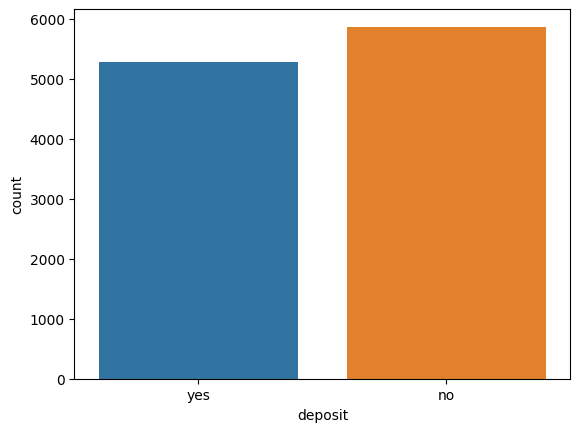

In [25]:
sns.countplot(x='deposit', data=bank_df, hue='deposit')
plt.show()

In [26]:
bank_df['deposit'].groupby(bank_df['deposit']).count()

,deposit
deposit,
no,5873
yes,5289


### **Feature Engineering**

* Drop unwanted Features
* Handle Missing Values
* Handle Categorical Features
* Handle Feature Scalling
* Remove Outliers

As per Exploratory Data Analysis EDA,


* no feature found with one value
* no missing value found
* 9 categorical features
* defaut features does not play impact role
* it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [27]:
bank_df2 = bank_df.copy()

In [28]:
bank_df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [29]:
bank_df2.shape

(11162, 17)

In [30]:
#default column does not play impact role

bank_df2.groupby(['deposit', 'default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [31]:
bank_df2.drop(['default'], axis=1, inplace=True)

In [32]:
bank_df2.groupby(['deposit', 'pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [33]:
#drop pdays as it has -1 value for around 40%

bank_df2.drop(['pdays'], axis=1, inplace=True)

In [34]:
#check the age data

bank_df2.groupby('age', sort=True)['age'].count()

,age
age,
18,8
19,13
20,20
21,30
22,48
...,...
89,1
90,2
92,2


In [35]:
#chech the outlier on balanced dataset

bank_df2.groupby(['deposit', 'balance'], sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [36]:
#check the outlier on duration dataset

bank_df2.groupby(['deposit', 'duration'], sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [37]:
#check the outlier on campaign dataset

bank_df2.groupby(['deposit', 'campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [38]:
bank_df3 = bank_df2[bank_df2['campaign'] < 33]

In [39]:
#check again the outlier on campaign dataset

bank_df3.groupby(['deposit', 'campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9             21
         10            14
         11            16
         12             4
         13             6
         14             4
         15             4
         16             2
         17             6
         20             1
         21             1
         24             1
         29             1
         32             1
Name: campaign, dtype: int64

In [40]:
#check the outlier on previous feature

bank_df3.groupby(['deposit', 'previous'], sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13             9
         14             5
         15             1
         17             3
         19             2
         20             1
         21             1
         22             1
         23             1
         26             1
         29             1
         30             1
         55             1
         58             1
Name: previous, dtype: int64

In [41]:
bank_df4 = bank_df3[bank_df3['previous'] < 31]

In [42]:
#check the outlier on previous feature

bank_df4.groupby(['deposit', 'previous'], sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13             9
         14             5
         15             1
         17             3
         19             2
         20             1
         21             1
         22             1
         23             1
         26             1
         29             1
         30             1
Name: previous, dtype: int64

In [43]:
#categorical features

cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in cat_columns:
    bank_df4 = pd.concat([bank_df4.drop(col, axis=1),
                          pd.get_dummies(bank_df4[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False).astype(int)],
                         axis=1)

In [44]:
# Boolean Encoding (Konversi 'yes'/'no' menjadi 1/0)
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    bank_df4[col+'_new']=bank_df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    bank_df4.drop(col, axis=1, inplace=True)

In [45]:
bank_df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


### **Split data into training and testing data**

In [46]:
X = bank_df4.drop('deposit_new', axis=1)
y = bank_df4['deposit_new']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
len(X_train), len(y_train), len(X_test), len(y_test)

(8921, 8921, 2231, 2231)

### **Model Selection**

In [48]:
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85154062 0.84585202 0.84136771 0.85762332 0.8559417 ]
0.8504650739219454


In [49]:
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85658263 0.85762332 0.85313901 0.85650224 0.86154709]
0.8570788584492093


In [49]:
#create param

model_param = {
    'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2,4,1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model': XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}


In [ ]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [ ]:
scores

### **Model Building**

In [50]:
#as per above results, xgboost gives best result and hence selecting same to model building
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [51]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
model_xgb.score(X_test,y_test)

0.8565665620797849

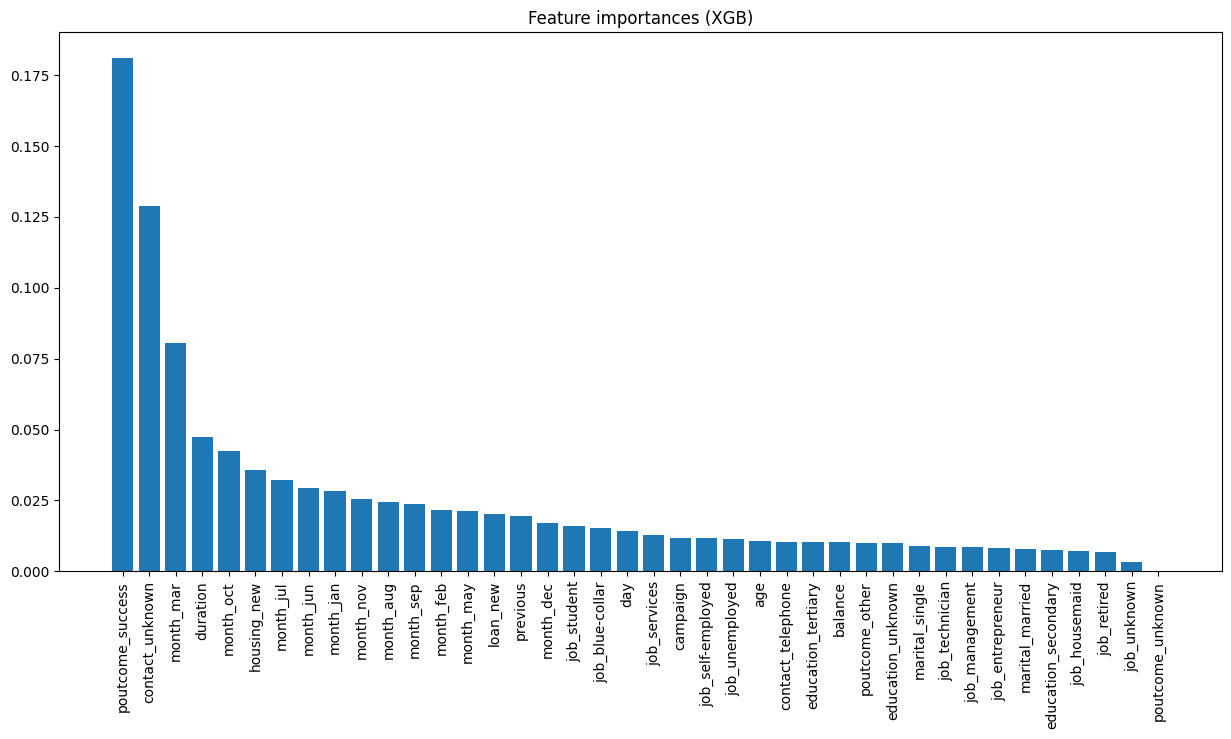

In [54]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[989, 190],
       [130, 922]])

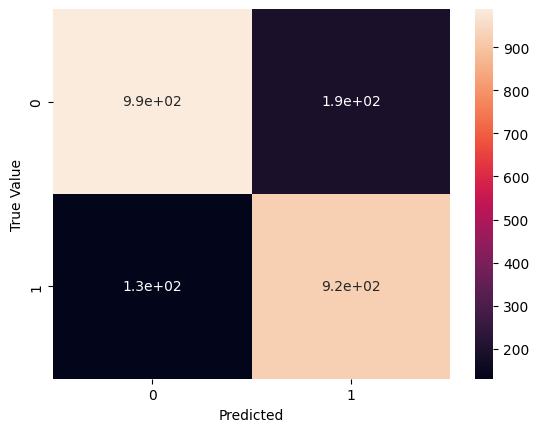

In [56]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()
